Imports and setup

In [ ]:
import os

# Standard libraries
import numpy as np
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Custom utils
from utils import generate_data, display_results , h 

# For reproducibility
seed = 42
np.random.seed(seed)


# Ensure figures folder exists
figures_dir = "../figures"
os.makedirs(figures_dir, exist_ok=True)


Define bias–variance estimation function

In [6]:
def estimate_bias_variance(model_class, model_params, N=80, p=5, M=100, sigma=1.0, X_test=None, seed=None):
    rng = np.random.default_rng(seed)
    if X_test is None:
        # Generate a test set to cover input distribution
        X_test, _ = generate_data(500, p, sigma=0, seed=seed)
    n_test = X_test.shape[0]
    all_preds = np.zeros((M, n_test))
    
    for m in range(M):
        # Generate learning sample
        X_train, y_train = generate_data(N, p, sigma=sigma, seed=None if seed is None else seed+m)
        # Train model
        model = model_class(**model_params)
        model.fit(X_train, y_train)
        all_preds[m] = model.predict(X_test)
    
    # Mean prediction across models
    y_pred_mean = all_preds.mean(axis=0)
    # True output (no noise)
    y_true = h(X_test)
    
    # Bias^2
    bias2 = np.mean((y_true - y_pred_mean)**2)
    # Variance
    variance = np.mean(np.var(all_preds, axis=0))
    # Residual error (noise variance)
    residual = sigma**2
    # Total expected error
    total = bias2 + variance + residual
    
    return {
        'bias2': bias2,
        'variance': variance,
        'residual': residual,
        'total': total,
        'y_pred_mean': y_pred_mean,
        'y_true': y_true,
        'X_test': X_test
    }


Generate test set

In [7]:
# Large test set for evaluation
N_test = 500
p = 5
X_test, _ = generate_data(N_test, p, sigma=0, seed=seed)


Run experiments for Ridge, kNN, Tree

In [8]:
# Ridge regression
ridge_params = {'alpha': 1.0}
results_ridge = estimate_bias_variance(Ridge, ridge_params, N=80, p=p, M=100, sigma=1.0, X_test=X_test, seed=seed)

# kNN
knn_params = {'n_neighbors': 5}
results_knn = estimate_bias_variance(KNeighborsRegressor, knn_params, N=80, p=p, M=100, sigma=1.0, X_test=X_test, seed=seed)

# Decision Tree
tree_params = {'max_depth': 5}
results_tree = estimate_bias_variance(DecisionTreeRegressor, tree_params, N=80, p=p, M=100, sigma=1.0, X_test=X_test, seed=seed)


display_results("Ridge Regression", results_ridge)
display_results("k-Nearest Neighbors", results_knn)
display_results("Decision Tree", results_tree)

--- Ridge Regression ---
Bias²      : 17.1585
Variance   : 1.4670
Residual   : 1.0000
Total error: 19.6255


--- k-Nearest Neighbors ---
Bias²      : 16.9324
Variance   : 3.0123
Residual   : 1.0000
Total error: 20.9448


--- Decision Tree ---
Bias²      : 1.1064
Variance   : 3.4970
Residual   : 1.0000
Total error: 5.6035




Plot results vs x1

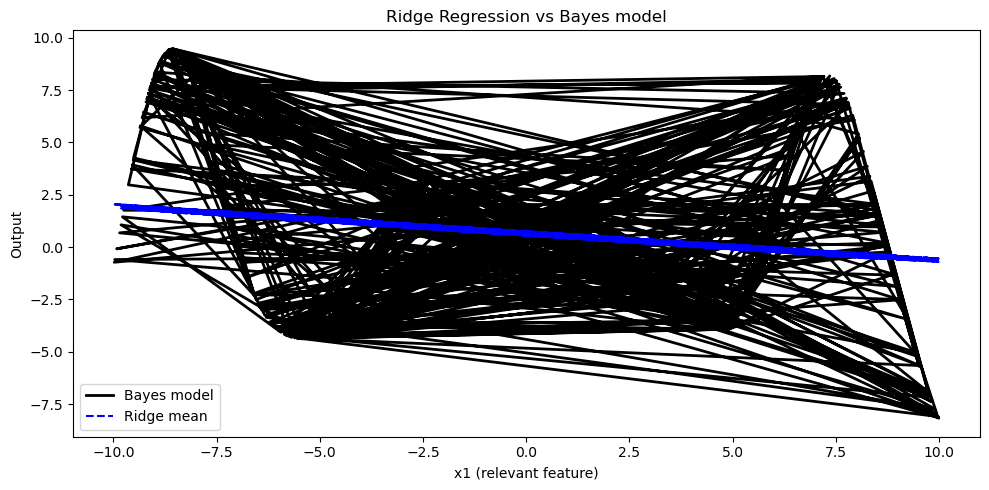

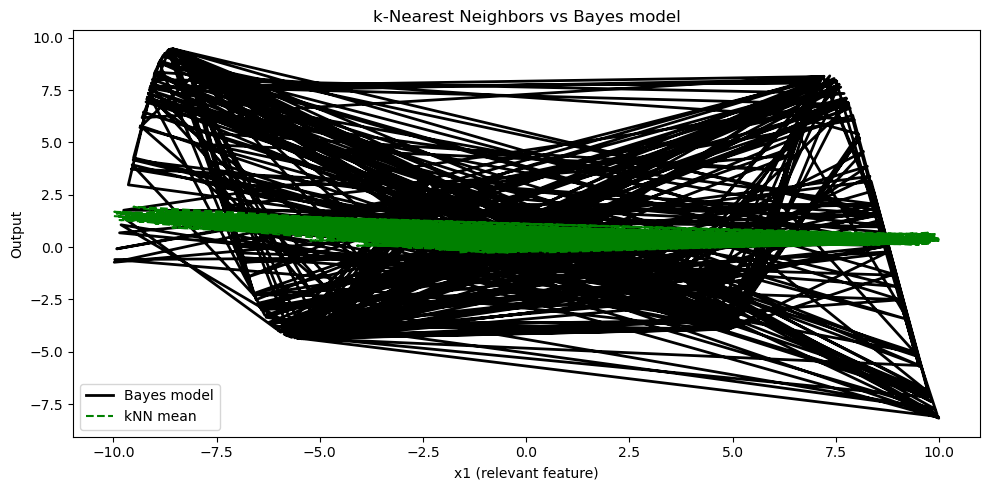

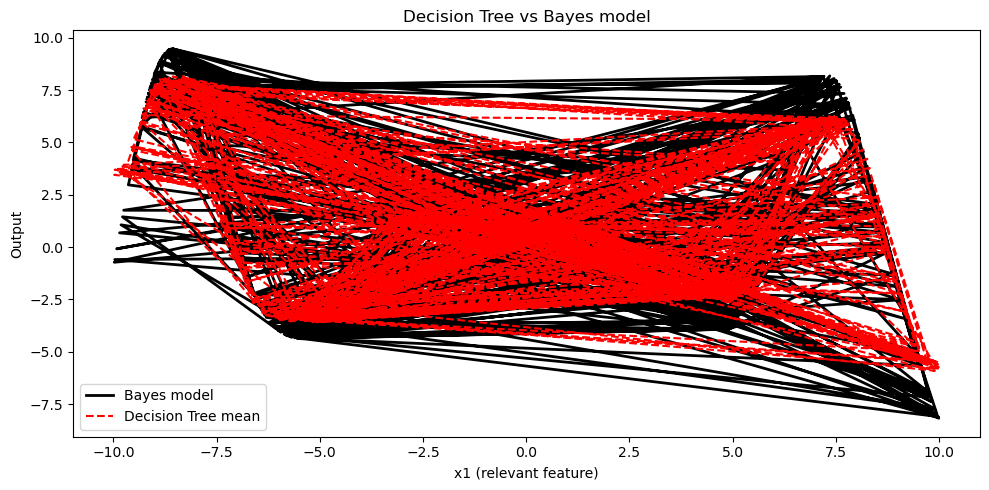

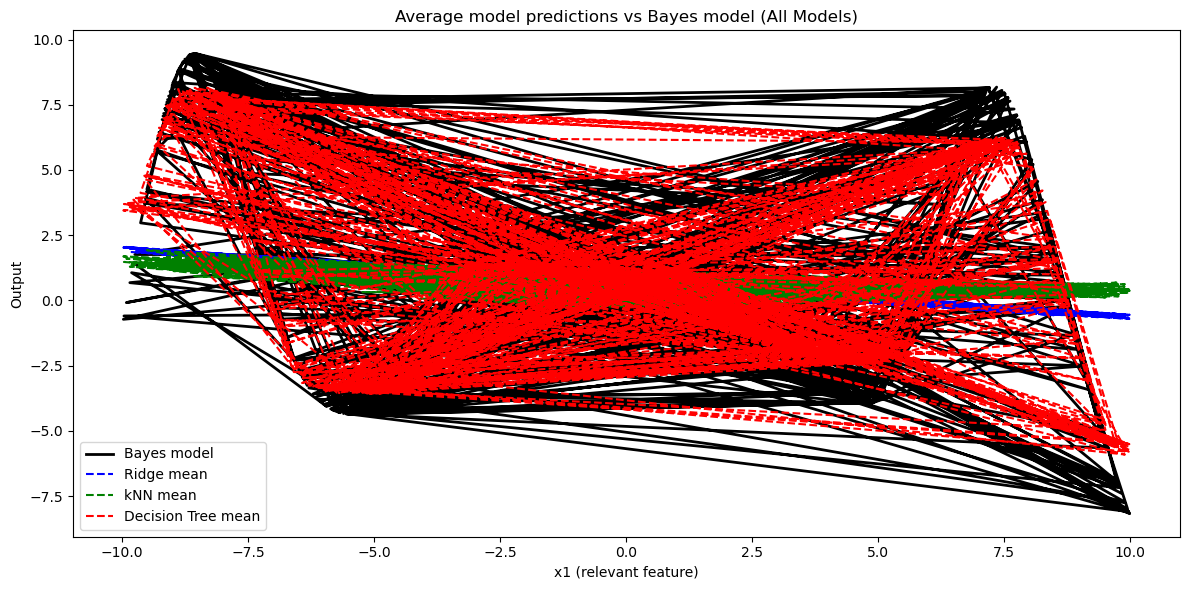

In [ ]:

# ---------------------------
# Ridge vs Bayes
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(X_test[:, 0], h(X_test), label='Bayes model', color='black', linewidth=2)
plt.plot(X_test[:, 0], results_ridge['y_pred_mean'], label='Ridge mean', linestyle='--', color='blue')
plt.xlabel('x1 (relevant feature)')
plt.ylabel('Output')
plt.title('Ridge Regression vs Bayes model')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "ridge_vs_bayes.png"))
plt.show()

# ---------------------------
# kNN vs Bayes
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(X_test[:, 0], h(X_test), label='Bayes model', color='black', linewidth=2)
plt.plot(X_test[:, 0], results_knn['y_pred_mean'], label='kNN mean', linestyle='--', color='green')
plt.xlabel('x1 (relevant feature)')
plt.ylabel('Output')
plt.title('k-Nearest Neighbors vs Bayes model')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "knn_vs_bayes.png"))
plt.show()

# ---------------------------
# Decision Tree vs Bayes
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(X_test[:, 0], h(X_test), label='Bayes model', color='black', linewidth=2)
plt.plot(X_test[:, 0], results_tree['y_pred_mean'], label='Decision Tree mean', linestyle='--', color='red')
plt.xlabel('x1 (relevant feature)')
plt.ylabel('Output')
plt.title('Decision Tree vs Bayes model')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "tree_vs_bayes.png"))
plt.show()

# ---------------------------
# All models together
# ---------------------------
plt.figure(figsize=(12, 6))
plt.plot(X_test[:, 0], h(X_test), label='Bayes model', color='black', linewidth=2)
plt.plot(X_test[:, 0], results_ridge['y_pred_mean'], label='Ridge mean', linestyle='--', color='blue')
plt.plot(X_test[:, 0], results_knn['y_pred_mean'], label='kNN mean', linestyle='--', color='green')
plt.plot(X_test[:, 0], results_tree['y_pred_mean'], label='Decision Tree mean', linestyle='--', color='red')
plt.xlabel('x1 (relevant feature)')
plt.ylabel('Output')
plt.title('Average model predictions vs Bayes model (All Models)')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "all_models_vs_bayes.png"))
plt.show()


Plot bias², variance, residual, total

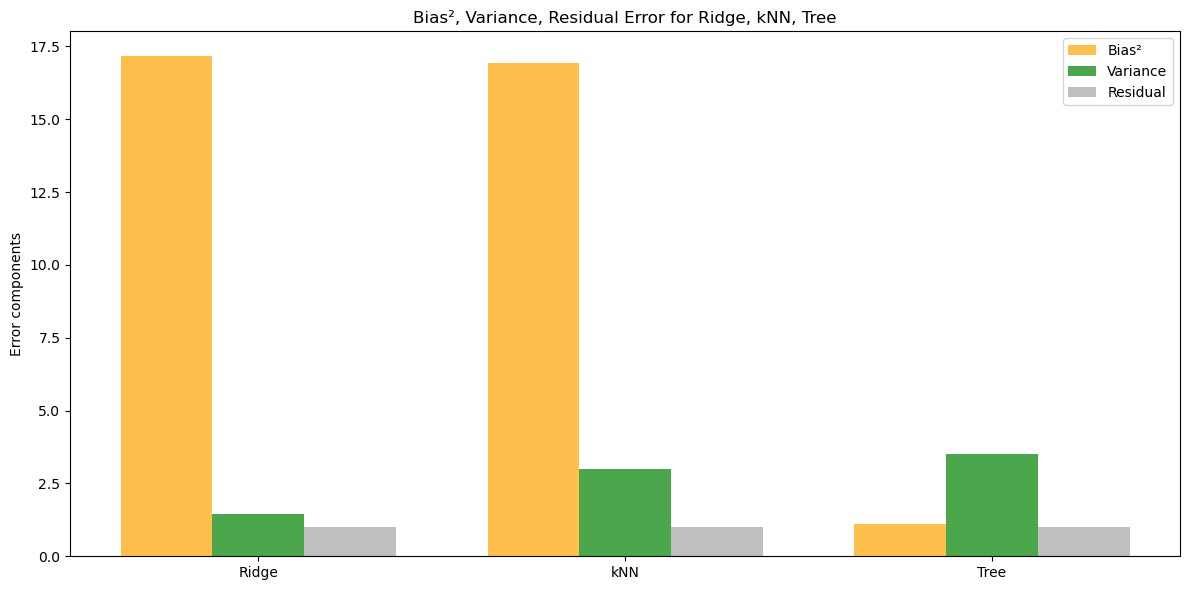

In [20]:
models = ['Ridge', 'kNN', 'Tree']
results_list = [results_ridge, results_knn, results_tree]
colors = ['blue', 'green', 'red']

# Bar positions
x = np.arange(len(models))
width = 0.25  # width of each bar

plt.figure(figsize=(12, 6))

# Plot Bias²
plt.bar(x - width, [res['bias2'] for res in results_list], width, label='Bias²', alpha=0.7, color='orange')
# Plot Variance
plt.bar(x, [res['variance'] for res in results_list], width, label='Variance', alpha=0.7, color='green')
# Plot Residual
plt.bar(x + width, [res['residual'] for res in results_list], width, label='Residual', alpha=0.5, color='gray')

plt.xticks(x, models)
plt.ylabel('Error components')
plt.title('Bias², Variance, Residual Error for Ridge, kNN, Tree')
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(figures_dir, "bias_variance_barplot.png"))

# Show the figure
plt.show()